# ![Logotip de Spark](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png)

# Activitat BATCH

## Sistema de fitxers HDFS i extracció de coneixement de fonts de dades heterogènies mitjançant RDDs

En aquesta pràctica començarem amb una breu introducció a HDFS (Hadoop Distributed File System), per entendre com s'emmagatzema i distribueix la informació. Després, ens endinsarem en Spark RDDs i  Spark SQL per processar grans volums de dades de manera eficient. Per finalitzar, treballarem amb dades relacionals i la seva gestió en entorns distribuïts.

### Puntuació de l'activitat:
- **Exercici 1**: Gestió i anàlisi de dades en HDFS *(0.5 punts)*
- **Exercici 2**: Manipulació de RDDs en PySpark *(1.25 punts)*
- **Exercici 3**: Anàlisi de Dades de Tweets en PySpark *(1.25 punts)*
- **Exercici 4**: Optimització de Càlculs amb Persistència *(0.25 punts)*
- **Exercici 5**: Anàlisi de Tweets mitjançant DataFrames i consultes SQL *(2 punts)*
- **Exercici 6**: Anàlisi de Tweets Geolocalitzats *(1.5 punts)*
- **Exercici 7**: Anàlisi del Patró d'Activitat Horària a Twitter *(1 punts)*
- **Exercici 8**: Anàlisi de la Relació entre Tweets i Diputats per Província *(0.75 punts)*
- **Exercici 9**: Anàlisi d'Interaccions de Retweets i Graus d'Usuari *(0.75 punts)*
- **Exercici 10**: Distribució del Grau de Sortida en una Xarxa de Retweets *(0.75 punts)*

# **HDFS (Hadoop Distributed File System)**

<img src="https://hadoop.apache.org/docs/r1.2.1/images/hadoop-logo.jpg">

**HDFS (Hadoop Distributed File System)** és una part essencial de l'ecosistema Big Data d'Apache Hadoop. HDFS està dissenyat per emmagatzemar i gestionar grans volums de dades distribuïdes en diversos nodes d'un clúster, proporcionant alta tolerància a fallades i escalabilitat. En aquest primer exercici, interactuarem amb HDFS mitjançant la línia de comandes dins de l'entorn de **JupyterLab**, el que ens permetrà familiaritzar-nos amb les operacions bàsiques d'aquest sistema de fitxers distribuït.

Per començar, és necessari obrir un terminal des de **JupyterLab**. Un cop obert, podem enviar comandes al sistema de fitxers HDFS, que són molt similars a les comandes de bash en entorns Linux. Algunes de les comandes d'HDFS que executarem començaran amb `hdfs dfs`, seguides de l'operació que desitgem realitzar. Per exemple, si volem llistar els fitxers i directoris en el directori arrel d'HDFS, utilitzarem la comanda ls de la següent manera:

In [32]:
!hdfs dfs -ls /

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/bigtop/3.3.0/usr/lib/hadoop/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/bigtop/3.3.0/usr/lib/tez/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Reload4jLoggerFactory]
Found 20 items
drwxr-xr-x   - hdfs   hdfs            0 2025-07-22 16:13 /alluxio
drwxr-xr-x   - hdfs   hdfs            0 2025-07-21 11:29 /amshbase
drwxrwxrwt   - yarn   hadoop          0 2025-10-22 23:46 /app-logs
drwxr-xr-x   - hdfs   hdfs            0 2025-07-22 12:45 /apps
drwxr-xr-x   - yarn   hadoop          0 2025-07-21 11:32 /ats
drwxr-xr-x   - hdfs   hdfs            0 2025-07-21 11:32 /atsv2
drwxr-xr-x   - sgraul hdfs            0 2025-09-24 13:49 /aula_M2.858
drwxr-xr-x   - hdfs   hdfs            0 2025-0

És important que totes les comandes s'executin correctament en l'entorn **JupyterLab** per obtenir els resultats desitjats.

Per consultar la documentació completa de les comandes disponibles en HDFS, pots accedir a la guia oficial en el següent enllaç: [HDFS Command Guide](https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/HDFSCommands.html)

Al llarg d'aquest exercici, utilitzarem algunes de les comandes més comunes d'HDFS per realitzar operacions com la creació de directoris, la càrrega i descàrrega d'arxius, i la gestió de permisos, entre altres. A mesura que avancem, et familiaritzaràs amb l'estructura d'HDFS i com aprofitar les seves funcionalitats en entorns Big Data.

### **Exercici 1**: Gestió i anàlisi de dades a HDFS (*0.5 punts*)

En aquest exercici treballaràs amb un conjunt de registres de consum elèctric emmagatzemats en l'arxiu `consumo_hogar_2024.csv`, disponible a la ruta /aula_M2.858/data/consumo_hogar_2024.csv.

La teva tasca consisteix a realitzar una exploració completa de l'arxiu directament a HDFS, verificant-ne la mida, permisos, propietari, factor de replicació i nombre de blocs. També hauràs de comprovar que l'arxiu no presenta errors d'integritat ni blocs danyats.

Sense descarregar completament l'arxiu, analitza la seva estructura i verifica que les dades siguin llegibles (per exemple, revisant els encapçalaments i algunes files de mostra).

Un cop confirmis que l'arxiu és correcte, crea dins del teu espai personal a HDFS una carpeta anomenada procesado a la ruta /user/[el_teu_usuari]/ i reorganitza-hi l'arxiu aplicant un nom que indiqui que ha estat validat, per exemple consumo_hogar_2024_validado.csv.

Finalment, genera un petit informe de verificació (en text pla) que resumeixi la informació principal de l'arxiu (mida, blocs, factor de replicació, propietari i data del procés) i desa'l a la mateixa carpeta procesado.

In [33]:
hdfs_user_path = '/user'
hdfs_user_name = 'cdalmases'
hdfs_full_path = f"{hdfs_user_path}/{hdfs_user_name}"

file = '/aula_M2.858/data/consumo_hogar_2024.csv'
n = 80

# Informació bàsica del fitxer (permisos, propietari, tipus, mida i data de creació)
# Referència: https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/HDFSCommands.html#dfs
# Nota: els missatges de LOG de HDFS es desvien a la sortida NULL

print(f"{'='*n}")
print(f'Fitxer: {file}')
print(f"{'='*n}")
print(f'')

print(f"{'='*n}")
print(f'Informació bàsica:')
!hdfs dfs -ls -h {file}  2>/dev/null
print(f"{'='*n}")
print(f'')

# Informació detallada del fitxer
#     name (%n)
#     type (%F) 
#     filesize in bytes (%b)
#     permissions (%A)
#     user name of owner(%u)
#     group name of owner (%g)
#     access date(%x)
#     modification date (%y) 
#     block size (%o) --> mida en bytes. Segons la configuració, aproximadament 128Mb. 
#     replication (%r), 
# Referència: https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-common/FileSystemShell.html#stat

print(f"{'='*n}")
print(f'Informació detallada:')
print(f"{'='*n}")
!hdfs dfs -stat "Nom: %n ++ Tipus: %F ++ Mida(bytes): %b ++ Permisos: %A ++ Propietari: %u ++ Grup: %g ++ Mida del bloc: %o ++ Replicació: %r" {file} 2>/dev/null
print(f"{'='*n}")
print(f'')

# Número de blocs, rèpliques, localització i integritat del fitxer i els nodes
# Referència: https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/HDFSCommands.html#fsck
# Amb "-files -blocks -locations" es demana la localització de cada bloc
# La integritat la indica Status: HEALTHY/CORRUPT

print(f"{'='*n}")
print(f'Blocs, rèpliques, localització i integritat:')
print(f"{'='*n}")
!hdfs fsck {file} -files -blocks -locations 2>/dev/null
print(f"{'='*n}")
print(f'')

# Llegir només les 10 primeres línies del fitxer

print(f"{'='*n}")
print(f'Capçalera i primeres línies:')
print(f"{'='*n}")
!hdfs dfs -cat {file} 2>/dev/null | head -n 10
print(f"{'='*n}")
print(f'')

# Crear el directori 'processat' a la carpeta de l'usuari

print(f"{'='*n}")
print(f'Crear el directori {hdfs_full_path}/processat:')
print(f"{'='*n}")
!hdfs dfs -mkdir -p {hdfs_full_path}/processat 2>/dev/null 
print(f"{'='*n}")
print(f'')

print(f"{'='*n}")
print(f'Copiar el fitxer {hdfs_full_path}/processat/consumo_hogar_2024_processat.csv:')
print(f"{'='*n}")
!hdfs dfs -cp {file} {hdfs_full_path}/processat/consumo_hogar_2024_processat.csv 2>/dev/null
print(f"{'='*n}")
print(f'')

print(f"{'='*n}")
print(f"Comprovar que s'ha copiat el fitxer")
print(f"{'='*n}")
!hdfs dfs -ls -h {hdfs_full_path}/processat/ 2>/dev/null
print(f"{'='*n}")
print(f'')

print(f"{'='*n}")
print(f'Informació detallada del fitxer copiat:')
print(f"{'='*n}")
!hdfs dfs -stat "Nom: %n ++ Tipus: %F ++ Mida(bytes): %b ++ Permisos: %A ++ Propietari: %u ++ Grup: %g ++ Mida del bloc: %o ++ Replicació: %r" {hdfs_full_path}/processat/consumo_hogar_2024_processat.csv 2>/dev/null
print(f"{'='*n}")
print(f'')


#raise NotImplementedError()

Fitxer: /aula_M2.858/data/consumo_hogar_2024.csv

Informació bàsica:
-rw-r--r--   3 martam hdfs        711 2025-10-20 09:28 /aula_M2.858/data/consumo_hogar_2024.csv

Informació detallada:
Nom: consumo_hogar_2024.csv ++ Tipus: regular file ++ Mida(bytes): 711 ++ Permisos: rw-r--r-- ++ Propietari: martam ++ Grup: hdfs ++ Mida del bloc: 134217728 ++ Replicació: 3

Blocs, rèpliques, localització i integritat:
FSCK started by cdalmases (auth:SIMPLE) from /172.17.58.200 for path /aula_M2.858/data/consumo_hogar_2024.csv at Sat Nov 01 13:14:08 CET 2025

/aula_M2.858/data/consumo_hogar_2024.csv 711 bytes, replicated: replication=3, 1 block(s):  OK
0. BP-1495504404-172.17.58.6-1753086652608:blk_1073760312_19539 len=711 Live_repl=3  [DatanodeInfoWithStorage[172.17.58.200:50010,DS-269ffbda-b619-40ff-8bb8-b8d6d7acfd8a,DISK], DatanodeInfoWithStorage[172.17.58.201:50010,DS-def0af19-c2a5-4be3-bffe-a4a1ace3bfe6,DISK], DatanodeInfoWithStorage[172.17.58.6:50010,DS-94d61690-8bae-419c-8424-c5e44bf76713,DIS

# **Apache Spark RDDs (Resilient Distributed Datasets)**

En el marc del processament de grans volums de dades amb Apache Spark, els RDDs, o Resilient Distributed Datasets, juguen un paper fonamental. Un RDD és una col·lecció d'elements que es distribueixen a través d'un clúster de nodes i sobre la qual es poden aplicar operacions que s'executen en paral·lel.

Recordem les seves característiques:

- Immutabilitat: Un cop es crea un RDD, no es pot modificar. En lloc d'això, qualsevol operació que modifiqui les dades generarà un nou RDD.

- Distribució: Els RDDs estan repartits entre els diferents nodes del clúster, permetent un processament paral·lel eficient.

- Tolerància a Fallades: Els RDDs són resistents a fallades. En cas que un node falli, Spark pot reconstruir les dades perdudes a partir de les dades originals i les operacions realitzades.

Aquesta estructura permet un processament eficient i escalable de dades, cosa que és essencial per treballar amb grans volums d'informació en entorns de clúster.

A continuació es mostra el codi que heu d'executar per configurar el vostre entorn de Spark.

> Com a referència a tots els mètodes que es requereixen per implementar aquesta pràctica podeu consultar:
> * [API Python de Spark](https://archive.apache.org/dist/spark/docs/2.4.0/api/python/index.html)

### Configuració de l'entorn python + spark

In [34]:
import findspark
import os

SPARK_HOME_PATH = "/usr/bigtop/current/spark-client/" 
os.environ['SPARK_HOME'] = SPARK_HOME_PATH
findspark.init(SPARK_HOME_PATH)

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ActividadRDDs_usuario") \
    .master("local[*]") \
    .getOrCreate()

print(spark.sparkContext.appName)
print(spark.version)

sc=spark.sparkContext

25/11/01 13:14:22 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
ActividadSparkSQL_usuario
3.3.4


### **Ejercicio 2**: Manipulación de RDDs en PySpark (*1.25 puntos*)

En aquest exercici, et proporcionem dues llistes de nombres en les quals realitzaràs diverses operacions sobre elles utilitzant RDDs en PySpark. La solució i l’enfocament queden al teu criteri.

Context:

Tens dues llistes de nombres que representen dades de sensors:
- **Sensor A**: Nombres de l’1 al 25.
- **Sensor B**: Nombres del 15 al 35.

Has de crear RDDs a partir de les llistes de nombres de cada sensor. Un cop fet això, per al **Sensor A**, transforma cada nombre en una tupla `(nombre, nombre al cub)` i filtra només aquells nombres el cub dels quals sigui **múltiple de 7** i **major que 50**. L’RDD resultant s’emmagatzemarà en una variable anomenada `rdd_a_filtrado`. Finalment, agrupa els nombres filtrats segons si són **parells, senars o múltiples de 5** (un nombre pot pertànyer a més d’un grup), i desa aquest resultat en `rdd_a_grupos`.

Tornant als RDDs inicials, calcula la intersecció entre els RDDs de **Sensor A i Sensor B**, desa’l en `rdd_interseccion` i calcula la diferència de **Sensor B menys Sensor A**, que es desarà en `rdd_diferencia`. A continuació, realitza una unió d’ambdós RDDs, eliminant els valors duplicats i ordenant-los de major a menor, desant el resultat en `rdd_union`.

- Imprimeix els resultats de cadascuna de les operacions realitzades utilitzant el mètode `collect()`.


In [35]:
# Sensors i els seus valors
sensorA = list(range(1, 26))
sensorB = list(range(15, 36))

rdd_sensorA = sc.parallelize(sensorA)
rdd_sensorB = sc.parallelize(sensorB)

print(f'\n')
print(f'Sensor A: {sorted(rdd_sensorA.collect())}')
print(f'Sensor B: {sorted(rdd_sensorB.collect())}')
print(f'\n')


# ############################
# 1.- Transformar sensor A
# ############################
rdd_sensorA_tuples = rdd_sensorA.map(lambda n: (n, n**3))

# Mostrar per pantalla rdd_sensorA_tuples 
print(f'Tuples sensorA: {rdd_sensorA_tuples.collect()}')

rdd_a_filtrado = rdd_sensorA_tuples.filter(lambda t: (t[1] % 7 == 0) and (t[1] > 50))

# Mostrar per pantalla rdd_a_filtrado
print(f'\nTuples filtrades: {rdd_a_filtrado.collect()}')

# Funció per classificar els cubs. Un cub pot classificar-se en més d'un grup.
def classifica(n):
    grups = []
    if n % 2 == 0:
        grups.append(("parell", n))
    else:
        grups.append(("senar", n))
    if n % 5 == 0:
        grups.append(("multiple_5", n))
    return grups

# Classificar els cubs filtrats.
## flatmap() classifica cada tupla. El retorn és una llista 'aplanada' de clau-valor
## groupByKey() agrupa els elements de la llista per la clau i retorna una llista clau-iterable
## mapVaules() transforma els iterables d'una mateixa clau en una llista
rdd_a_grupos = rdd_a_filtrado.flatMap(lambda n: classifica(n[1]))\
                             .groupByKey()\
                             .mapValues(lambda it: list(it))

print(f'\nTuples classificades: {rdd_a_grupos.collect()}')

# ####################################
# 2.- Intersecció, diferència i unió  
# ####################################
# Intersecció: elements que apareixen en els dos RDD
rdd_interseccion = rdd_sensorA.intersection(rdd_sensorB)

print(f'\nIntersecció de sensorA i sensorB: {sorted(rdd_interseccion.collect())}')

# Diferencia sensorB - sensorA
# Retorna els elements que només es troben a sensorB
rdd_diferencia = rdd_sensorB.subtract(rdd_sensorA)

print(f'\nDiferència sensorB - sensorA: {sorted(rdd_diferencia.collect())}')

# Unió de rdd_sensorA i rdd_sensorB
## union() fusiona els dos RDDs mantenint els duplicats
## distinct() elimina els duplicats
## sortBy ordena el RDD resultat
rdd_union = rdd_sensorA.union(rdd_sensorB).distinct().sortBy(lambda x: x, ascending=False)

print(f'\nUnió de sensorA i sensorB: {rdd_union.collect()}')

#raise NotImplementedError()



Sensor A: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Sensor B: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


Tuples sensorA: [(1, 1), (2, 8), (3, 27), (4, 64), (5, 125), (6, 216), (7, 343), (8, 512), (9, 729), (10, 1000), (11, 1331), (12, 1728), (13, 2197), (14, 2744), (15, 3375), (16, 4096), (17, 4913), (18, 5832), (19, 6859), (20, 8000), (21, 9261), (22, 10648), (23, 12167), (24, 13824), (25, 15625)]

Tuples filtrades: [(7, 343), (14, 2744), (21, 9261)]

Tuples classificades: [('senar', [343, 9261]), ('parell', [2744])]

Intersecció de sensorA i sensorB: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

Diferència sensorB - sensorA: [26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

Unió de sensorA i sensorB: [35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [36]:
# DO NOT USE THIS CELL

### **Ejercicio 3**: Anàlisi de Dades de Tweets en PySpark (*1.25 punts*)

En aquest exercici, treballaràs amb un fitxer JSON anomenat `tweets_sample.json` que es troba a la ruta `/aula_M2.858/data/tweets_sample.json`. Aquest fitxer conté dades de tweets i mètriques relacionades. Hauràs d’utilitzar PySpark per realitzar una anàlisi de les dades. L’estructura del fitxer JSON inclou informació com el nombre de retweets, likes, seguidors i més. Tot i això, per a aquest exercici, et centraràs a processar i analitzar el contingut textual dels tweets.

- Carrega el fitxer JSON en un RDD utilitzant el mètode `textFile()`. Examina l’estructura de les dades per identificar com extreure el contingut rellevant.

- Extreu el camp tweets de cadascun dels tweets. Defineix i aplica una funció per netejar el text. Aquesta funció ha d’eliminar la puntuació, convertir el text a minúscules i assegurar que hi hagi un únic espai entre les paraules.

- Divideix el text en paraules i filtra les paraules per quedar-te amb aquelles que tinguin menys de 7 caràcters. Després, realitza un recompte de paraules diferents i desa’l a la variable `palabras_distintas_rdd`.

- Finalment, troba les 5 paraules més freqüents que acabin en vocal. Desa-ho a la variable `top_5_palabras`.

- Imprimeix els resultats de cadascuna de les operacions realitzades.

In [37]:
import re  #REGEX
import json
n = 80

pathFile = '/aula_M2.858/data/tweets_sample.json'

# Carregar el fitxer JSON Lines
rdd_json = sc.textFile(pathFile)

# Examinar l'estructura de les dades
print(f"{'='*n}")
print(f'Estructura de les dades, per línies (5):')
print(f"{'='*n}")
for line in rdd_json.take(5):
    print(f'{line}')
print(f"{'='*n}")

# Funció per netejar el camp "tweet"
def clean_tweet(line_json):
    try:
        data = json.loads(line_json)  # Converteix cada línia JSON a dict
        text = data.get("tweet", "")
        tweet = text.lower()  # tot a minúscules
        # Sentències REGEX
        tweet = re.sub(r"[^a-zA-Z0-9áéíóúàèìòùïüñÁÉÍÓÚÀÈÌÒÙÏÜÑ\s]", " ", tweet)  # elimina puntuació per espai
        tweet = re.sub(r"\s+", " ", tweet).strip()  # espais simples
        return tweet
    except:
        return ""

rdd_tweets = rdd_json.map(clean_tweet)

print(f"{'='*n}")
print(f'Tweets nets (5):')
print(f"{'='*n}")
print(f'{rdd_tweets.take(5)}')
print(f"{'='*n}")

# Separar les paraules dels tweets
rdd_words = rdd_tweets.flatMap(lambda tweet: tweet.split(" "))

print(f"{'='*n}")
print(f'Paraules (30):')
print(f"{'='*n}")
print(f'{rdd_words.take(30)}')
print(f"{'='*n}")

# Filtrar només paraules amb menys de 7 caràcters i no buides
rdd_seven_char = rdd_words.filter(lambda w: len(w) < 7 and w != "")

print(f"{'='*n}")
print(f'Paraules de menys de 7 caràcters (30):')
print(f"{'='*n}")
print(f'{rdd_seven_char.take(30)}')
print(f"{'='*n}")

# Comptar paraules diferents
## El primer map crea, per a cada paraula, el diccionari (key:paraula, value:1)
## reduceByKey suma els 'value' per a la mateixa 'key' (paraula)
## sortBy ordena descendent pel valor 'x[1]'
palabras_distintas_rdd = rdd_seven_char.map(lambda w: (w, 1)).reduceByKey(lambda a, b: a+b).sortBy(lambda x: x[1], ascending=False)

print(f"{'='*n}")
print(f'Paraules de menys de 7 caràcters més freqüents (10), ordenades per freqüència descendent:')
print(f"{'='*n}")
print(f'{palabras_distintas_rdd.take(10)}')
print(f"{'='*n}")

# Paraules més freqüents que acaben en vocal
## Primer filtro per 'endswith'
## Per garantir l'ordre, ordeno per 'value' descendent
## Finalment, de la llista ordenada, recullo els 5 primers
top_5_palabras = palabras_distintas_rdd.filter(lambda w: w[0].endswith(('a','e','i','o','u','à','è','é','í','ï','ò','ó','ú','ü'))).sortBy(lambda x: x[1], ascending=False).take(5) 

print(f"{'='*n}")
print(f'TOP 5 paraules acabades en vocal, ordenades per freqüència descendent:')
print(f"{'='*n}")
print(f'{top_5_palabras}')
print(f"{'='*n}")


Estructura de les dades, per línies (5):
{"tweet_id": 1, "user": "usuario1", "followers": 150, "retweets": 5, "likes": 10, "tweet": "¡Hola mundo! Este es un tweet de prueba para ver cómo funciona. #prueba #mundo"}
{"tweet_id": 2, "user": "usuario2", "followers": 300, "retweets": 2, "likes": 7, "tweet": "Los datos son el nuevo petróleo. Analiza, visualiza y actúa. #data #análisis"}
{"tweet_id": 3, "user": "usuario3", "followers": 500, "retweets": 15, "likes": 20, "tweet": "Un día productivo en la oficina. ¿Alguna vez has tenido un día así? #productividad"}
{"tweet_id": 4, "user": "usuario4", "followers": 250, "retweets": 10, "likes": 5, "tweet": "¿Sabías que Python es uno de los lenguajes de programación más utilizados? #Python #programación"}
{"tweet_id": 5, "user": "usuario5", "followers": 100, "retweets": 1, "likes": 3, "tweet": "La programación puede ser divertida y emocionante. ¡No te rindas! #programación"}
Tweets nets (5):
['hola mundo este es un tweet de prueba para ver cómo fun

In [38]:
# DO NOT USE THIS CELL

### **Exercici 4**: Optimització de Càlculs amb Persistència (*0.25 punts*)

Per reduir els temps d'execució en Spark, és fonamental utilitzar la persistència d'un RDD mitjançant el mètode `persist()`. Aquesta tècnica és particularment útil quan es realitzen múltiples operacions repetides sobre un mateix RDD.

Quan persisteixes un RDD, Spark emmagatzema les dades en memòria (o en disc, depenent del nivell de persistència, per veure més sobre els nivells de persistència aneu a la web [Persistència Spark](https://archive.apache.org/dist/spark/docs/2.4.0/rdd-programming-guide.html#rdd-persistence)) per evitar recomputacions cada vegada que es necessita realitzar una acció sobre el RDD. Això significa que cada node del clúster guarda en la seva memòria les particions del RDD que ha processat, permetent que les següents operacions sobre el RDD siguin molt més ràpides.

**Mesura de Rendiment**

Per mesurar la millora en els temps d'execució, podem utilitzar la funció màgica `%%time` en un entorn Jupyter Notebook, que permet observar:

- Wall clock time: Temps total real que porta executar una tasca, incloent la CPU, el temps d'entrada/sortida (I/O), i les possibles comunicacions entre nodes en el clúster.

- CPU time: Temps efectiu en què la CPU està ocupada executant la tasca, excloent altres latències com la d'entrada/sortida.

En aquest exercici, s'explorarà l'ús de la persistència en RDDs (Resilient Distributed Datasets) utilitzant PySpark. L'objectiu és observar com la persistència afecta el rendiment de les operacions de transformació i acció sobre els RDDs.

- Crea un RDD a partir d'una llista de números que va de l'1 al 10.000.

- Filtra el RDD per obtenir només els números majors a 5.000 i emmagatzema aquest resultat en un nou RDD.

- Aplica una transformació per duplicar els valors del RDD filtrat i guarda'l en un nou RDD.

In [39]:
# Crear un rdd amb números del 1 al 10.000
rdd_numbers = sc.range(1, 10001)

# Filtrar només els superiors a 5.000
rdd_filtered = rdd_numbers.filter(lambda x: x>5000)

# Crear una tupla amb el valor filtrat i el seu doble
rdd_double = rdd_filtered.map(lambda x: (x, x*2))

- Utilitza el mètode collect() per recuperar i mostrar els números majors a 5.000 i els seus dobles, i mesura el temps que triga en executar-se aquesta operació utilitzant la funció màgica `%%time`.

In [40]:
%%time

r = rdd_double.collect()
print(f'Les 10 primeres tuples: {r[:10]}')

Les 10 primeres tuples: [(5001, 10002), (5002, 10004), (5003, 10006), (5004, 10008), (5005, 10010), (5006, 10012), (5007, 10014), (5008, 10016), (5009, 10018), (5010, 10020)]
CPU times: user 163 ms, sys: 17 ms, total: 180 ms
Wall time: 266 ms


- Aplica la persistència sobre el RDD de nombres majors a 5.000 per a que ele seu contingut es mantingui en memòria entre les operacions.

In [41]:
# Aplico la persistència al RDD filtrat
rdd_filtered.persist()

PythonRDD[226] at RDD at PythonRDD.scala:53

- Torna a executar el mètode collect() com abans. Compara aquest temps amb el temps de la primera execució. (Pots executar-lo diverses vegades i veure què passa amb el temps de processament.)

In [42]:
%%time

r = rdd_double.collect()
print(f'Les 10 primeres tuples: {r[:10]}')

Les 10 primeres tuples: [(5001, 10002), (5002, 10004), (5003, 10006), (5004, 10008), (5005, 10010), (5006, 10012), (5007, 10014), (5008, 10016), (5009, 10018), (5010, 10020)]
CPU times: user 8.45 ms, sys: 5.09 ms, total: 13.5 ms
Wall time: 79.3 ms


- Elimina la persistència de l'RDD utilitzant `unpersist()` per alliberar recursos i atura la sessió de Spark al final de l'exercici amb `sc.stop()`.

In [43]:
rdd_filtered.unpersist()
sc.stop()

- Al finalitzar l'exercici, analitza i comenta els resultats obtinguts, explicant com la persistència va afectar el rendiment dels teus càlculs.

__Comentaris__

* Sense persistència al RDD filtrat, el càlcul dels dobles i el collect presenta un _time wall_ de 304ms
* Amb la persistència del RDD filtrat (totes les dades en memòria), el següent càlcul de dobles i el collect presenta un _time wall_ de 100ms, aproximadament.

__En aquest cas, l'ús de la persistència a fet que els càlculs vagin 3 vegades més ràpids.__

# **Apache Spark Dataframes**

En aquesta part de la pràctica introduirem els elements que ofereix Spark per treballar amb estructures de dades. Veurem des d'estructures molt simples fins a estructures complexes, on els camps poden al seu torn tenir camps niats. En concret utilitzarem dades de Twitter capturades en el context de les eleccions generals a Espanya del 28 d'abril de 2019.

### Configuració de l'entorn

In [44]:
import findspark
import os

SPARK_HOME_PATH = "/usr/bigtop/current/spark-client/" 
os.environ['SPARK_HOME'] = SPARK_HOME_PATH
findspark.init(SPARK_HOME_PATH)

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ActividadSparkSQL_usuario") \
    .enableHiveSupport() \
    .master("local[1]") \
    .getOrCreate()
#    .config("spark.hadoop.hive.execution.engine", "mr") \
#    .enableHiveSupport() \

print(spark.sparkContext.appName)
print(spark.version)

sc=spark.sparkContext

25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4046. Attempting port 4047.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4047. Attempting port 4048.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4048. Attempting port 4049.
25/11/01 13:14:26 WARN Utils: Service 'SparkUI' could not bind on port 4049. Attempting port 4050.
25/11/01 1

In [45]:
import re
import os
import pandas as pd
from matplotlib import pyplot as plt
from math import floor
from pyspark import SparkConf, SparkContext, SQLContext
from pyspark.sql import Row

In [46]:
SUBMIT_ARGS = "--jars /opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar pyspark-shell"

os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS

## Introducció a dataframes estructurats i operacions sobre ells

Com ja s'ha mencionat, en els següents exercicis utilitzarem dades de Twitter que vam recollir durant les eleccions generals a Espanya del 28 d'abril de 2019. Com veurem, els tweets tenen una estructura interna força complexa que hem simplificat una mica en aquesta pràctica.

El primer que aprendrem és com importar aquest tipus de dades al nostre entorn. Un dels tipus d'arxius més comuns per guardar aquest format d'informació és [l'estructura JSON](https://en.wikipedia.org/wiki/JSON). Aquesta estructura permet guardar informació en un text pla de diferents objectes seguint una estructura de diccionari on cada camp té assignat una clau i un valor. L'estructura pot ser niada, és a dir, que una clau pot tenir com a valor una altra estructura de tipus diccionari.

Spark SQL permet llegir dades de molts formats diferents. Se us demana que [llegiu el fitxer JSON](https://archive.apache.org/dist/spark/docs/2.4.0/sql-data-sources-json.html) de la ruta ```/aula_M2.858/data/tweets28a_sample.json```. Aquest arxiu conté una petita mostra, un 0.1% de la base de dades completa (en un següent apartat veurem com realitzar aquest mostreig). En aquesta ocasió no se us demana especificar l'estructura del dataframe ja que la funció de lectura la inferirà automàticament.

**Exemple de lectura (Omplir amb el corresponent per a la lectura de l'arxiu json)**:

```Python
tweets_sample = spark.read.json(<FILL IN>)

print("Loaded dataset contains %d tweets" % tweets_sample.count())
```

Per mostrar l'estructura del dataset que acabem de carregar, podeu obtenir la informació sobre com està estructurat el DataTable utilitzant el mètode ```printSchema()```. Heu de familiaritzar-vos amb aquesta estructura ja que serà la que utilitzarem durant els propers exercicis. Recordeu també que no tots els tweets tenen tots els camps, com per exemple la ubicació (camp ```place```). Quan això passa el camp passa a ser ```NULL```. Podeu veure més informació sobre aquest tipus de dades en [aquest enllaç](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

Ara heu d'introduir l'exemple de lectura amb el `<FILL IN>` omplert segons correspongui per a la lectura de l'arxiu JSON. I, a continuació, mostrareu l'estructura del dataset utilitzant `printSchema()`.

In [47]:
pathFile = '/aula_M2.858/data/tweets28a_sample.json'
tweets_sample = spark.read.json(pathFile)
print("Loaded dataset contains %d tweets" % tweets_sample.count())
tweets_sample.printSchema()

Loaded dataset contains 27268 tweets
root
 |-- _id: string (nullable = true)
 |-- created_at: long (nullable = true)
 |-- lang: string (nullable = true)
 |-- place: struct (nullable = true)
 |    |-- bounding_box: struct (nullable = true)
 |    |    |-- coordinates: array (nullable = true)
 |    |    |    |-- element: array (containsNull = true)
 |    |    |    |    |-- element: array (containsNull = true)
 |    |    |    |    |    |-- element: double (containsNull = true)
 |    |    |-- type: string (nullable = true)
 |    |-- country_code: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- place_type: string (nullable = true)
 |-- retweeted_status: struct (nullable = true)
 |    |-- _id: string (nullable = true)
 |    |-- user: struct (nullable = true)
 |    |    |-- followers_count: long (nullable = true)
 |    |    |-- friends_count: long (nullable = true)
 |    |    |-- id_str: string (nullable = true)
 |    |    |-- 

In [48]:
assert tweets_sample.count() == 27268, "Incorrect answer"

### Consultes sobre dataframes complexos

A continuació veurem com realitzar consultes sobre el dataset dels tweets. Utilitzarem [sentències *SQL*](https://www.w3schools.com/sql/default.asp) (com les utilitzades en la majoria de bases de dades relacionals).

El primer que s'ha de fer és registrar el dataframe de tweets com una taula de SQL. Per a això utilitzarem [sqlContext.registerDataFrameAsTable()](https://archive.apache.org/dist/spark/docs/2.4.0/api/python/pyspark.sql.html#pyspark.sql.SQLContext.registerDataFrameAsTable). Per executar comandes sql només heu d'utilitzar el mètode sql() de l'objecte context, en aquest cas `sqlContext`.

#### Consultes a través del pipeline
Les taules de Spark SQL ofereixen un altre mecanisme per aplicar les transformacions i obtenir resultats similars als que s'obtindrien aplicant una consulta SQL. Per exemple, utilitzant el següent pipeline obtindrem el text de tots els tweets en espanyol:

```
tweets_sample.where("lang == 'es'").select("text")
```

Què és equivalent a la següent sentència SQL:

```
SELECT text
FROM tweets_sample
WHERE lang == 'es'
```

Podeu consultar l'[API de spark SQL](https://archive.apache.org/dist/spark/docs/2.4.0/api/python/pyspark.sql.html) per trobar més informació sobre com utilitzar les diferents transformacions en taules.

### **Exercici 5**: Anàlisi de Tweets mitjançant DataFrames i consultes SQL (*2 punts*)

Anteriorment ja has realitzat la lectura del conjunt `tweets28a_sample.json` en format JSON. Ara hauràs d'assegurar-te de registrar el DataFrame com una taula SQL anomenada `tweets_sample`.

***Nota:*** A causa que és possible que executis aquestes línies de codi diverses vegades, prendrem la precaució d'executar la comanda SQL per eliminar taules abans que les creïs, ja que pot existir la possibilitat que ja existeixin.

`sqlContext.sql("DROP TABLE IF EXISTS tweets_sample")`

A continuació, es demana crear una taula i registrar-la amb el nom ```users_agg``` amb [la informació agregada](https://www.w3schools.com/sql/sql_groupby.asp) dels usuaris que tinguin definit el seu idioma (```user.lang```) com a espanyol (```es```). En concret es demana que la taula contingui les següents columnes:
- **screen_name:** nom de l'usuari
- **friends_count:** nombre màxim (veure nota) de persones a les quals segueix
- **tweets:** nombre de tweets realitzats
- **followers_count:** nombre màxim (veure nota) de persones que segueixen l'usuari.

L'ordre en el qual s'han de mostrar els registres és ordre descendent d'acord amb el nombre de tweets.

***Nota:*** És important que tinguis en compte que el nom de *friends* i *followers* pot diferir al llarg de l'adquisició de dades. En aquest cas utilitzarem la funció d'agregació `MAX` sobre cadascun d'aquests camps per evitar segmentar l'usuari en diverses instàncies.

In [49]:
# Creo sqlContext a partir de la sessió Spark existent
sqlContext = SQLContext(sc)

# Elimino la taula si existeix
sqlContext.sql("DROP TABLE IF EXISTS tweets_sample")

# Registro la taula al sqlContext
sqlContext.registerDataFrameAsTable(tweets_sample, "tweets_sample")

# Elimino la taula users_agg si existeix
sqlContext.sql("DROP TABLE IF EXISTS users_agg")

# Consulta SQL
sqlText = """
    SELECT
        user.screen_name AS screen_name,
        MAX(user.friends_count) AS friends_count,
        COUNT(*) AS tweets,
        MAX(user.followers_count) AS followers_count
    FROM tweets_sample
    WHERE user.lang = 'es'
    GROUP BY user.screen_name
    ORDER BY tweets DESC
"""

users_agg = sqlContext.sql(sqlText)

sqlContext.registerDataFrameAsTable(users_agg, "users_agg")

users_agg.show()


/usr/bigtop/current/spark-client/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


2025-11-01T13:14:32,080 INFO [Thread-4] org.apache.hadoop.hive.conf.HiveConf - Found configuration file file:/usr/bigtop/current/hive-client/conf/hive-site.xml
2025-11-01T13:14:32,199 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.heapsize does not exist
2025-11-01T13:14:32,199 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.hook.proto.base-directory does not exist
2025-11-01T13:14:32,200 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.strict.managed.tables does not exist
2025-11-01T13:14:32,201 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.stats.fetch.partition.stats does not exist
25/11/01 13:14:32 WARN HiveClientImpl: Detected HiveConf hive.execution.engine is 'tez' and will be reset to 'mr' to disable useless hive logic
2025-11-01T13:14:32,244 INFO [Thread-4] SessionState - Hive Session ID = 496cd842-7212-45b7-bc13-8f4ebaac2e6e


Hive Session ID = 496cd842-7212-45b7-bc13-8f4ebaac2e6e


2025-11-01T13:14:32,391 INFO [Thread-4] org.apache.hadoop.hive.metastore.HiveMetaStoreClient - Trying to connect to metastore with URI thrift://eimtcld3node2:9083
2025-11-01T13:14:32,417 INFO [Thread-4] org.apache.hadoop.hive.metastore.HiveMetaStoreClient - Opened a connection to metastore, current connections: 1
2025-11-01T13:14:32,452 INFO [Thread-4] org.apache.hadoop.hive.metastore.HiveMetaStoreClient - Connected to metastore.
2025-11-01T13:14:32,452 INFO [Thread-4] org.apache.hadoop.hive.metastore.RetryingMetaStoreClient - RetryingMetaStoreClient proxy=class org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient ugi=cdalmases (auth:SIMPLE) retries=24 delay=5 lifetime=0


[Stage 8:==========================================>                (5 + 1) / 7]

+---------------+-------------+------+---------------+
|    screen_name|friends_count|tweets|followers_count|
+---------------+-------------+------+---------------+
|       anaoromi|         6258|    16|           6774|
|    RosaMar6254|         6208|    14|           6245|
|        lyuva26|         3088|    13|           3732|
|PisandoFuerte10|         2795|    12|           1752|
|     carrasquem|          147|    12|            215|
|       jasalo54|         1889|    11|            689|
| locuspolitikus|        11261|     9|          10244|
|  PabloChabolas|         4925|     9|           4042|
|      lolalailo|         4922|     9|           3738|
|  Rafa_eltorete|          908|     9|           1060|
|    DuroBelinda|         5242|     9|           5778|
|     Lordcrow11|         5002|     9|           3069|
|      kikyosanz|          154|     9|            273|
|   rosavergar23|          900|     8|           1224|
|       LianaEHE|         5272|     8|           5014|
|        F

In [50]:
# DO NOT USE THIS CELL

A continuació, recorrerem al [JOIN de taules](https://www.w3schools.com/sql/sql_join.asp) per combinar la informació entre taules. Has de combinar la taula `users_agg` i la taula `tweets_sample` utilitzant un `INNER JOIN` per obtenir una nova taula amb el nom `retweeted` amb la següent informació:
- ***screen_name:*** nom d'usuari
- ***friends_count:*** nombre màxim de persones a les quals segueix
- ***followers_count:*** nombre màxim de persones que segueixen l'usuari.
- ***tweets:*** nombre de tweets realitzats per l'usuari.
- ***retweeted:*** nombre de retweets obtinguts per l'usuari.
- ***ratio_tweet_retweeted:*** ràtio de retweets per nombre de tweets publicats $\frac{retweets}{tweets}$

La taula resultant `retweeted` ha d'estar ordenada de manera descendent segons el valor de la columna `ratio_tweet_retweeted`.

Per últim, utilitzant queries a través de pipeline, has de crear una taula `user_retweets` a partir de la taula `tweets_sample`, utilitzant transformacions que contingui dues columnes:
- ***screen_name:*** nom d'usuari
- ***retweeted:*** nombre de retweets

Ordena la taula en ordre descendent utilitzant el valor de la columna ```retweeted```.

In [51]:
# Eliminar la taula si existeix
sqlContext.sql("DROP TABLE IF EXISTS retweeted")

# Per comptar tots els retweeteds que ha rebut un usuari:
# Per a tots els tweets, a partir de l'element retweeted_status que indica quin és el tweet original i el seu autor, 
# compto el número de vegades que apareix un autor. Per tant, és el número total de retweets que ha rebut.
# L'element retweeted_status ha de ser no null (indica que aquest tweet és un retweet).

# Un cop sabut el número total de retweets que ha rebut un usuari, faig INNER JOIN amb la taula user_agg per obtenir
# les altres dades de l'usuari.
# Com que és un INNER JOIN, només s'obtenen aquells usuaris que han rebut retweets (i òbviament que han fet algun tweet).

sqlText = """
    SELECT
        u.screen_name AS screen_name,
        u.friends_count AS friends_count,
        u.followers_count AS followers_count,
        u.tweets AS tweets,
        r.num_retweeteds AS num_retweeteds,
        r.num_retweeteds/u.tweets AS ratio_tweet_retweeted
    FROM users_agg u
    INNER JOIN (
        SELECT
            retweeted_status.user.screen_name AS screen_name,
            COUNT(*) AS num_retweeteds
        FROM tweets_sample t
        WHERE retweeted_status IS NOT NULL
        GROUP BY retweeted_status.user.screen_name
    ) r
    ON u.screen_name = r.screen_name
    ORDER BY ratio_tweet_retweeted DESC
"""

retweeted = sqlContext.sql(sqlText)
sqlContext.registerDataFrameAsTable(retweeted, "retweeted")
retweeted.show()

# ##############################################################################################################
# Taula user_retweets amb Pipelines
# Utilitzo la llibreria de funcions estàndard de PySpark
# Referència: https://archive.apache.org/dist/spark/docs/3.3.4/api/python/reference/pyspark.sql/functions.html
# ##############################################################################################################
from pyspark.sql import functions as F

user_retweets = (
    tweets_sample
    .filter(F.col("retweeted_status").isNotNull()) # només tweets que són retuits
    .groupBy(F.col("retweeted_status.user.screen_name").alias("screen_name"))  # agrupar pel nom d'usuari retuitejat
    .agg(F.count("*").alias("retweeted")) # comptar nombre de retuits
    .orderBy(F.desc("retweeted")) # ordenar descendentment
)

# Registrar la taula com a vista SQL
sqlContext.registerDataFrameAsTable(user_retweets, "user_retweets")

# Mostrar resultats
user_retweets.show()

# S'ha comprovat que, per exemple, 'vox_es' no apareix a la taula tweets_sample (autor del tweet) però si que apareix com autor dels retweets.
# Això explica la diferència entre les dues taules.


+---------------+-------------+---------------+------+--------------+---------------------+
|    screen_name|friends_count|followers_count|tweets|num_retweeteds|ratio_tweet_retweeted|
+---------------+-------------+---------------+------+--------------+---------------------+
|           PSOE|        13635|         671073|     1|           155|                155.0|
|   CiudadanosCs|        92910|         511896|     1|           117|                117.0|
|      JuntsXCat|          202|          88515|     1|            73|                 73.0|
|   PartidoPACMA|         1498|         232932|     1|            63|                 63.0|
|   pablocasado_|         4567|         238926|     1|            50|                 50.0|
| voxnoticias_es|         2146|          29582|     1|            44|                 44.0|
| RaiLopezCalvet|         7579|          13574|     1|            43|                 43.0|
|         iunida|        10225|         558318|     1|            39|           

[Stage 17:=================================================>        (6 + 1) / 7]

+---------------+---------+
|    screen_name|retweeted|
+---------------+---------+
|         vox_es|      299|
|  Santi_ABASCAL|      238|
|   ahorapodemos|      238|
|       iescolar|      166|
|  AlbanoDante76|      161|
|           PSOE|      155|
| AntonioMaestre|      154|
|           KRLS|      149|
|         boye_g|      142|
|   CiudadanosCs|      117|
|Pablo_Iglesias_|      108|
|  gabrielrufian|       98|
|     eldiarioes|       97|
|       ivanedlm|       89|
|sanchezcastejon|       88|
|      gerardotc|       86|
|        el_pais|       86|
|    protestona1|       84|
|      populares|       79|
|        LVPibai|       79|
+---------------+---------+
only showing top 20 rows



In [52]:
# DO NOT USE THIS CELL

## Bases de dades HIVE i operacions complexes

Fins ara hem estat treballant amb un petit *sample* dels tweets generats (el 0.1%). En aquesta part de l’activitat veurem com treballar i tractar amb el dataset complet. Per a això utilitzarem tant transformacions sobre taules com operacions sobre RDD quan sigui necessari.

És important tenir en compte que moltes vegades les dades amb les quals treballem s’utilitzaran en diversos projectes. En lloc de gestionar directament els fitxers, és més eficient i organitzat recórrer a una base de dades per gestionar la informació. En l’ecosistema Hadoop, una de les bases de dades més utilitzades és [Apache Hive](https://hive.apache.org/). Tot i això, és crucial entendre que Hive no és una base de dades convencional. En realitat, funciona com un *metastore* que mapeja fitxers al sistema de fitxers distribuït de Hadoop (HDFS).

Això significa que Hive no emmagatzema les dades en el seu propi format de base de dades, sinó que actua com una interfície que permet als usuaris executar consultes SQL sobre les dades emmagatzemades a HDFS. Això proporciona una forma eficient d’accedir i manipular grans volums de dades distribuïdes sense necessitat de moure-les o convertir-les a un format tradicional de base de dades.

La manera d’accedir a aquesta base de dades és tal com es mostra en el següent codi (heu d’executar-lo).

In [53]:
# 1. Obtener la lista de objetos 'Table'
tables_list = spark.catalog.listTables()

# 2. Convertir la lista de objetos en una lista de tuplas (Nombre, BD, Temporal)
# Utilizamos una comprensión de lista (list comprehension)
data_for_df = [(t.name, t.database, t.isTemporary) for t in tables_list]

# 3. Definir el esquema manualmente para evitar cualquier inferencia automática
from pyspark.sql.types import StructType, StructField, StringType, BooleanType

manual_schema = StructType([
    StructField("Nombre_Tabla", StringType(), True),
    StructField("Base_Datos", StringType(), True),
    StructField("Es_Temporal", BooleanType(), True)
])

# 4. Crear el DataFrame con los datos y el esquema definido
tables_df = spark.createDataFrame(data_for_df, schema=manual_schema)

# 5. Mostrar el resultado
tables_df.show()

+-----------------+----------+-----------+
|     Nombre_Tabla|Base_Datos|Es_Temporal|
+-----------------+----------+-----------+
|        boxscores|   default|      false|
|    boxscores_ext|   default|      false|
|boxscores_interna|   default|      false|
|boxscores_managed|   default|      false|
|    boxscores_orc|   default|      false|
|   boxscores_parq|   default|      false|
|    ext_boxscores|   default|      false|
|        ext_games|   default|      false|
|     ext_injuries|   default|      false|
|      ext_players|   default|      false|
|        ext_teams|   default|      false|
|            games|   default|      false|
|        games_ext|   default|      false|
|    games_interna|   default|      false|
|    games_managed|   default|      false|
|        games_orc|   default|      false|
|       games_parq|   default|      false|
|         injuries|   default|      false|
|     injuries_ext|   default|      false|
| injuries_interna|   default|      false|
+----------

### Més enllà de les transformacions SQL

Algunes vegades necessitarem obtenir resultats que requereixen operacions que van més enllà del que podem aconseguir (còmodament) utilitzant el llenguatge SQL. En aquesta part de la pràctica practicarem com passar d’una taula a un RDD, per fer operacions complexes, i després tornar a passar a una taula.

Ara ve la part interessant. Una taula pot convertir-se en un RDD a través de l’atribut ```.rdd```. Aquest atribut guarda la informació de la taula en una llista on cada element és un [objecte del tipus ```Row```](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Row). Els objectes pertanyents a aquesta classe poden veure’s com diccionaris on la informació de les diferents columnes queda reflectida en forma d’atribut. Per exemple, imagineu que tenim una taula amb dues columnes, nom i cognom; si utilitzem l’atribut ```.rdd``` d’aquesta taula obtindrem una llista amb objectes del tipus Row on cada objecte té dos atributs: nom i cognom. Per accedir als atributs només heu d’utilitzar la sintaxi *punt* de Python, e.g., ```row.nom``` o ```row.cognom```.

### **Exercici 6**: Anàlisi de Tweets Geolocalitzats (*1.5 punts*)

Dada la taula de tweets `tweets28a_sample25`, heu de crear una variable `tweets` utilitzant l’objecte `spark` i el mètode `table()`. Utilitzant una sentència SQL, es requereix extreure informació sobre els tweets que contenen dades de geolocalització (és a dir, aquells on el camp `place` no és nul) i determinar quants tweets s’han generat des de cada lloc. Els resultats s’han de presentar en ordre descendent per la quantitat de tweets.

**Esquema sentència SQL**
```Python
tweets_place = spark.sql(<FILL IN>)
```

A continuació, creeu una taula anomenada `tweets_place` que contingui dues columnes:

- ***name:*** nom del lloc des d’on s’ha generat el tweet.
- ***tweets:*** número total de tweets realitzats des d’aquest lloc.

Finalment, mostreu els 10 llocs amb més tweets en la taula resultant.

A més, creeu una taula anomenada `tweets_geo` que contingui únicament els tweets que tenen informació de geolocalització, i assegureu-vos que inclogui el nom del lloc. A partir d’aquesta taula, creeu un objecte ```tweets_place_rdd``` que contingui una llista de tuples amb la informació ```(name, tweets)``` sobre el nom del lloc i el número de tweets generats des d’allí.

Un cop generat aquest RDD, crearem una taula. El primer pas és generar per cada tuple un objecte Row que contingui un atribut ```name``` i un atribut ```tweets```. Ara només heu d’aplicar el mètode ```toDF()``` per generar una taula. Ordeneu les files d’aquesta taula pel número de tweets en ordre descendent.

L’exercici s’haurà de realitzar combinant tant sentències SQL com RDD en Apache Spark.


In [54]:
# Taula des del catàleg de Hive
tweets = spark.table("tweets28a_sample25")

# Registrar la taula com a temporal
# Referència: https://archive.apache.org/dist/spark/docs/3.3.4/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.createOrReplaceTempView.html
tweets.createOrReplaceTempView("tweets")

tweets_place = spark.sql("""
    SELECT
        place.name AS name,
        COUNT(*) AS tweets
    FROM tweets
    WHERE place IS NOT NULL
    GROUP BY place.name
    ORDER BY tweets DESC
""")

# Deso el resultat de l'operació en una taula persistent a HIVE (saveAsTable)
# Uso 'overwrite' per sobreescriure si ja existeix
tweets_place.write.mode("overwrite").saveAsTable("tweets_place")

# Obre la taula des de Hive
tweets_place_df = spark.table("tweets_place")

# Mostro els 10 primers registres ordenats
print(f"{'='*n}")
print(f'Número de tweets per localitat, Taula Hive')
print(f"{'='*n}")
tweets_place_df.orderBy("tweets", ascending=False).show(10)
print(f"{'='*n}")
print(f'')

# ##############################################
#  Taula tweets_geo
# ##############################################

# A partir de la taula 'tweets' existent a Hive
# Només deso l'identificador únic del tweet i el nom de la localització
tweets_geo = tweets.filter("place IS NOT NULL").selectExpr("_id as tweet_id", "place.name AS name")

# Deso la taula tweets_geo, que conté tots els tweets amb geolocalització, de forma persistent a Hive
tweets_geo.write.mode("overwrite").saveAsTable("tweets_geo")

# Sobre la taula tweets_geo, comptar el número de tweets per localitat. Obtenir un RDD.
# Ordeno el dataframe abans de fer la conversió a RDD
# Sense utilitzar SQL
tweets_place_rdd = tweets_geo.groupBy("name") \
                             .count() \
                             .withColumnRenamed("count", "tweets") \
                             .orderBy("tweets", ascending=False) \
                             .rdd.map(lambda row: (row['name'], row['tweets']))

print(f"{'='*n}")
print(f'Número de tweets per localitat, RDD')
print(f"{'='*n}")
for name, tweets in tweets_place_rdd.take(10):
    print(f"{name}: {tweets}")
print(f"{'='*n}")
print(f'')


# ##############################################
#  de RDD a taula Hive
# ##############################################

# Importar objecte Row
from pyspark.sql import Row

# Convertir tuples de RDD en un objecte row
rows_rdd = tweets_place_rdd.map(lambda x: Row(name=x[0], tweets=x[1]))

# Converteixo els Row a DataFrame
tweets_place_2 = rows_rdd.toDF()

# Deso la taula tweets_place_2 de forma persistent a Hive
tweets_place_2.write.mode("overwrite").saveAsTable("tweets_place_2")

# Mostro les 10 primeres files ordenades
print(f"{'='*n}")
print(f'Número de tweets per localitat, de RDD a taula Hive')
print(f"{'='*n}")
tweets_place_2.orderBy("tweets", ascending=False).show(10)
print(f"{'='*n}")
print(f'')

2025-11-01T13:14:51,112 INFO [Thread-4] org.apache.hadoop.hive.ql.security.authorization.plugin.sqlstd.SQLStdHiveAccessController - Created SQLStdHiveAccessController for session context : HiveAuthzSessionContext [sessionString=496cd842-7212-45b7-bc13-8f4ebaac2e6e, clientType=HIVECLI]
2025-11-01T13:14:51,114 WARN [Thread-4] org.apache.hadoop.hive.ql.session.SessionState - METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
2025-11-01T13:14:51,115 INFO [Thread-4] org.apache.hadoop.hive.metastore.HiveMetaStoreClient - Mestastore configuration metastore.filter.hook changed from org.apache.hadoop.hive.metastore.DefaultMetaStoreFilterHookImpl to org.apache.hadoop.hive.ql.security.authorization.plugin.AuthorizationMetaStoreFilterHook
2025-11-01T13:14:51,122 INFO [Thread-4] org.apache.hadoop.hive.metastore.HiveMetaStoreClient - Closed a connection to metastore, current connections: 0
2025-11-01T13:14:51,123 INFO [Thread

Número de tweets per localitat, RDD
Madrid: 4911
Barcelona: 3481
Sevilla: 959
Valencia: 689
Zaragoza: 597
Villamartín: 570
Málaga: 546
Murcia: 461
Palma: 416
Alicante: 407

Número de tweets per localitat, de RDD a taula Hive
+-----------+------+
|       name|tweets|
+-----------+------+
|     Madrid|  4911|
|  Barcelona|  3481|
|    Sevilla|   959|
|   Valencia|   689|
|   Zaragoza|   597|
|Villamartín|   570|
|     Málaga|   546|
|     Murcia|   461|
|      Palma|   416|
|   Alicante|   407|
+-----------+------+
only showing top 10 rows




In [55]:
# DO NOT USE THIS CELL

## Mostreig

En moltes ocasions, abans de llançar processos costosos, és una pràctica habitual tractar amb un petit conjunt de les dades per investigar algunes propietats o simplement per depurar els nostres algoritmes, a aquesta tasca se la coneix com a mostreig. En aquesta part de la pràctica veurem els dos principals mètodes de mostreig i com utilitzar-los.

### Nota:
Per produir un gràfic de barres utilitzant [Pandas](https://pandas.pydata.org/) on es mostri la informació que acabeu de generar. Primer transformeu la taula a pandas utilitzant el mètode `toPandas()`. Ploteu la taula resultant utilitzant [la funcionalitat gràfica de pandas.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

### Homogeni

El primer mostreig que veurem és [l'homogeni](https://en.wikipedia.org/wiki/Simple_random_sample). Aquest mostreig es basa en simplement escollir una fracció de la població seleccionant aleatòriament elements d'aquesta.

Primer de tot realitzarem un mostreig homogeni de l'1% dels tweets generats en període electoral sense reemplaçament. Guardeu en una variable ```tweets_sample``` aquest mostreig utilitzant el mètode ```sample``` descrit a l'[API de pyspark SQL](https://archive.apache.org/dist/spark/docs/2.4.0/api/python/pyspark.sql.html). La llavor que utilitzareu per inicialitzar el generador aleatori és 42.

**Esquema**
```Python
seed = 42
fraction = 0.01

tweets_sample = tweets.<FILL IN>

print("Number of tweets sampled: {0}".format(tweets_sample.count()))
```

### **Exercici 7**: Anàlisi del Patró d'Activitat Horària a Twitter (*1 punts*)
A partir d'una mostra de l'1% dels tweets disponibles, es desitja analitzar el patró d'ús diari de Twitter, prestant especial atenció a l'activitat horària. L'objectiu és calcular i visualitzar la mitjana de tweets generats en cada hora del dia. Per a això s'ha de crear una taula ```tweets_timestamp``` amb la informació:
- ***created_at***: timestamp de quan es va publicar el tweet.
- ***hour***: a quina hora del dia correspon.
- ***day***: Data en format MM-dd-YY

La taula ha d'estar en ordre ascendent segons la columna `created_at`

**Pista**: Per crear les columnes "hour" i "day" a la teva taula tweets_timestamp, pots utilitzar withColumn(). La funció ```hour``` et servirà per extreure l'hora del timestamp i la funció ```date_format``` et permetrà generar la data.

A continuació, utilitza la mostra de tweets per extreure l'hora i data de publicació, i a partir d'aquesta informació, determina quants tweets es generen per hora, has de crear una taula `tweets_hour_day` a partir d'aquesta informació.

Finalment, només ens queda fer una agregació per hora per aconseguir la mitjana de tweets per hora. Heu de generar una taula ```tweets_hour``` amb la informació:
- ***hour:*** Hora
- ***tweets:*** Mitjana de tweets realitzats

Recordeu que estem treballant amb un sample de l'1% per tant heu de corregir la columna ```tweets``` perquè reflecteixi la mitjana que hauríem d'esperar en el conjunt complet de tweets. La taula ha d'estar ordenada en ordre ascendent d'hora.

Number of tweets sampled: 64063
Taula tweets_timestamp


+-------------------+----+----------+
|         created_at|hour|       day|
+-------------------+----+----------+
|2019-04-12 06:30:52|   6|12-04-2019|
|2019-04-12 08:32:05|   8|12-04-2019|
|2019-04-12 10:44:57|  10|12-04-2019|
|2019-04-12 10:45:54|  10|12-04-2019|
|2019-04-12 10:47:56|  10|12-04-2019|
|2019-04-12 10:48:14|  10|12-04-2019|
|2019-04-12 10:50:26|  10|12-04-2019|
|2019-04-12 10:50:53|  10|12-04-2019|
|2019-04-12 10:53:19|  10|12-04-2019|
|2019-04-12 10:53:23|  10|12-04-2019|
+-------------------+----+----------+
only showing top 10 rows


Taula tweets_hour_day


+----------+----+------+
|       day|hour|tweets|
+----------+----+------+
|12-04-2019|   6|     1|
|12-04-2019|   8|     1|
|12-04-2019|  10|    18|
|12-04-2019|  11|    86|
|12-04-2019|  12|    97|
|12-04-2019|  13|    87|
|12-04-2019|  14|    91|
|12-04-2019|  15|   104|
|12-04-2019|  16|   104|
|12-04-2019|  17|    90|
+----------+----+------+
only showing top 10 rows


Mitjana de tweets per hora (UTC)


+----+--------+
|hour|  tweets|
+----+--------+
|   0|26311.11|
|   1|12772.22|
|   2| 6411.11|
|   3| 3311.76|
|   4| 2276.47|
|   5| 2082.35|
|   6| 3172.22|
|   7| 6576.47|
|   8|10044.44|
|   9|13635.29|
|  10|14611.11|
|  11|15261.11|
|  12|15611.11|
|  13|16761.11|
|  14|16816.67|
|  15|18161.11|
|  16|17255.56|
|  17|16261.11|
|  18|17016.67|
|  19|17183.33|
|  20|19561.11|
|  21|20788.89|
|  22| 30800.0|
|  23|34772.22|
+----+--------+




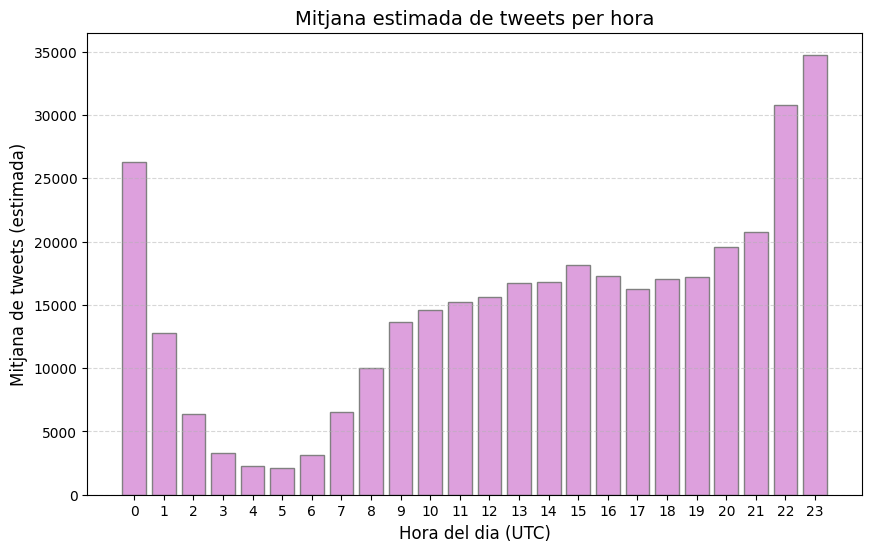

In [56]:
# Importar funcions per treballar amb timestamp
from pyspark.sql.functions import hour, date_format

# Torno a carregar la taula
tweets = spark.table("tweets28a_sample25")

seed = 42
fraction = 0.01

tweets_sample = tweets.sample(withReplacement=None, fraction=fraction, seed=seed)

print("Number of tweets sampled: {0}".format(tweets_sample.count()))

# ######################################################################
#                     Taula tweets_timestamp
# ######################################################################
# created_at és un long amb el timestamp en UTC

tweets_timestamp = (
    tweets_sample
    .select("created_at") 
    .withColumn("hour", hour("created_at"))
    .withColumn("day", date_format("created_at", "dd-MM-yyyy"))
    .orderBy("created_at", ascending=True)
)

# Per estar segurs, torno a ordena la sortida
print(f"{'='*n}")
print(f'Taula tweets_timestamp')
print(f"{'='*n}")
tweets_timestamp.orderBy("created_at", ascending=True).show(10)
print(f"{'='*n}")
print(f'')

# ######################################################################
#                Recompte de tweets per hora i dia
# ######################################################################
tweets_hour_day = (
    tweets_timestamp
    .groupBy("day", "hour")
    .count()
    .withColumnRenamed("count", "tweets")
    .orderBy("day", "hour")
)

print(f"{'='*n}")
print(f'Taula tweets_hour_day')
print(f"{'='*n}")
tweets_hour_day.orderBy(["day", "hour"], ascending=True).show(10)
print(f"{'='*n}")
print(f'')

# ######################################################################
#                Mitjana de tweets publicats per hora 
# ######################################################################
# Utilitzo la funcií F.avg i agg per calcular la mitjana per hores
# El dataset conté un mostreig de l'1% del total. Multiplico les mitjanes per 100
#  per obtenir un valor escalat.
# Arrodoneixo la mitjana a 2 decimals.
# ATENCIÓ: Les hores son UTC

tweets_hour = (
    tweets_hour_day
    .groupBy("hour")
    .agg(F.round((F.avg("tweets")*100), 2).alias("tweets"))
    .orderBy("hour")
)

print(f"{'='*n}")
print(f'Mitjana de tweets per hora (UTC)')
print(f"{'='*n}")
tweets_hour.orderBy(["hour"], ascending=True).show(24)
print(f"{'='*n}")
print(f'')


# ######################################################################
#                          Gràfic de barres 
# ######################################################################
# Convertir el DataFrame Spark a Pandas
tweets_hour_pd = tweets_hour.toPandas()

# Gràfic de barres amb matplotlib
plt.figure(figsize=(10, 6))
plt.bar(tweets_hour_pd["hour"], tweets_hour_pd["tweets"], color="plum", edgecolor="grey", linewidth=1.0)
plt.title("Mitjana estimada de tweets per hora", fontsize=14)
plt.xlabel("Hora del dia (UTC)", fontsize=12)
plt.ylabel("Mitjana de tweets (estimada)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()



In [57]:
# DO NOT USE THIS CELL

### Estratificat

En moltes ocasions el mostreig homogeni no és adequat ja que per la pròpia estructura de les dades determinats segments poden estar sobre-representades. Aquest és el cas que observem en els tweets on les grans àrees urbanes estan sobrerepresentades si ho comparem amb el volum de població. En aquesta activitat veurem com aplicar aquesta tècnica al dataset de tweets, per obtenir un mostreig que respecti la proporció de diputats per província.

A Espanya, el procés electoral assigna un volum de diputats a cada província que depèn de la població i d'un percentatge mínim assignat per llei. En el context Hive que hem creat prèviament (```hiveContext```) podem trobar una taula (```province_28a```) que conté informació sobre les circumscripcions electorals. Carregueu aquesta taula en una variable amb nom ```province```.

In [58]:
province = spark.table("province_28a")

province.limit(20).show()

+-----------+-----------+------------------+----------+---------+
|    capital|   province|              ccaa|population|diputados|
+-----------+-----------+------------------+----------+---------+
|     Teruel|     Teruel|            Aragón|     35691|        3|
|      Soria|      Soria|   Castilla y León|     39112|        2|
|    Segovia|    Segovia|   Castilla y León|     51683|        3|
|     Huesca|     Huesca|            Aragón|     52463|        3|
|     Cuenca|     Cuenca|Castilla-La Mancha|     54898|        3|
|      Ávila|      Ávila|   Castilla y León|     57697|        3|
|     Zamora|     Zamora|   Castilla y León|     61827|        3|
|Ciudad Real|Ciudad Real|Castilla-La Mancha|     74743|        5|
|   Palencia|   Palencia|   Castilla y León|     78629|        3|
| Pontevedra| Pontevedra|           Galicia|     82802|        7|
|     Toledo|     Toledo|Castilla-La Mancha|     84282|        6|
|Guadalajara|Guadalajara|Castilla-La Mancha|     84910|        3|
|      Ceu

In [59]:
assert province.count() == 52, "Incorrect answer"

Per fer un mostreig estratificat, primer hem de determinar la fracció que volem assignar a cada categoria. En aquest cas, volem una fracció que faci que la ràtio tweets per diputat sigui igual per a totes les capitals de província. Hem de tenir en compte que la precisió de la geolocalització a Twitter és normalment a nivell de ciutat. Per això, per evitar incrementar la complexitat de l'exercici, utilitzarem els tweets en capitals de província com a proxy dels tweets en tota la província.

### **Exercici 8**: Anàlisi de la Relació entre Tweets i Diputats per Província (*0.75 punts*)

El primer que heu de fer és crear una taula ```info_tweets_province``` que ha de contenir:
- ***capital:*** nom de la capital de província.
- ***tweets:*** nombre de tweets geolocalitzats en cada capital.
- ***diputats:*** diputats assignats a la província.
- ***ratio_tweets_diputat:*** nombre de tweets per diputat.

Heu d'ordenar la llista per ```ratio_tweets_diputado``` en ordre ascendent.

***Nota:*** Podeu realitzar aquest exercici de moltes maneres, probablement la més fàcil és utilitzar la taula ```tweets_place``` que heu generat en l'exercici 5. Recordeu com utilitzar el ```join()```.

In [60]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# VARIABLES DADAS
output = info_tweets_province.first()
maximum_ratio = floor(output.ratio_tweets_diputado * 100) / 100

In [ ]:
# DO NOT USE THIS CELL

A continuació, necessitem un diccionari amb el nom ```ratios``` on cada capital de província és una clau i el seu valor associat és la fracció de tweets que anem a mostrejar. En aquest cas, el que volem és que la ràtio de tweets per cada diputat sigui similar per a cada capital de província.

Com que volem que el mostreig sigui el més gran possible i no volem que cap capital estigui infrarepresentada, la ràtio de tweets per diputat serà el valor més petit que podeu observar a la taula ```info_tweets_province```, que correspon a 11.66 tweets per diputat a Teruel. Teniu aquest valor guardat a la variable ```maximum_ratio```.

*Nota:* El mètode ```collectAsMap()``` transforma un PairRDD en un diccionari.

Finalment, genera una taula ```geo_tweets``` amb tots els tweets geolocalitzats. Ara ja estem en disposició de fer el mostreig estratificat per població. Per a això podeu utilitzar el mètode ```sampleBy()```. Utilitzeu 42 com a llavor del generador pseudoaleatori.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# DO NOT USE THIS CELL

## Introducció a les dades relacionals

El fet de treballar amb una base de dades que conté informació generada en una xarxa social ens permet introduir el concepte de dades relacionals. Podem definir dades relacionals com aquelles en què existeixen relacions entre les entitats que constitueixen la base de dades. Si aquestes relacions són binàries, relacions 1 a 1, podem representar les relacions com un graf compost per un conjunt de vèrtexs $\mathcal{V}$ i un conjunt d'arestes $\mathcal{E}$ que els relacionen.

En el cas de grafs que emergeixen de manera orgànica, aquest tipus d'estructura va més enllà dels grafs regulars que segurament coneixeu. Aquest tipus d'estructures es coneixen com a [xarxes complexes](https://ca.wikipedia.org/wiki/Xarxa_complexa). L'estudi de l'estructura i dinàmiques d'aquest tipus de xarxes ha contribuït a importants resultats en camps tan dispars com la física, la sociologia, l'ecologia o la medicina.

![complex_network](https://images.squarespace-cdn.com/content/5150aec6e4b0e340ec52710a/1364574727391-XVOFAB9P6GHKTDAH6QTA/lastfm_800_graph_white.png?content-type=image%2Fpng)

En aquesta última part de la pràctica treballarem amb aquest tipus de dades. En concret modelarem una de les possibles relacions presents en el dataset, la xarxa de retweets.

#### Construcció de l'edgelist

El primer que se us demana és que genereu la xarxa. Hi ha diverses maneres de representar una xarxa complexa, per exemple, si estiguéssiu interessats a treballar-hi des del punt de vista teòric, la manera més habitual de representar-les és utilitzant una [matriu d'adjacència](https://ca.wikipedia.org/wiki/Matriu_d%27adjacència). En aquesta pràctica ens centrarem en l'aspecte computacional, una de les maneres més eficients (computacionalment parlant) de representar una xarxa és mitjançant la seva [*edge list*](https://en.wikipedia.org/wiki/Edge_list), una taula que especifica la relació a parelles entre les entitats.

Les relacions poden ser bidireccionals o direccionals i tenir algun pes assignat o no (weighted or unweighted). En el cas que ens ocupa, estem parlant d'una xarxa dirigida, un usuari retuiteja a un altre, i podem pensar-la tenint en compte quantes vegades això ha passat.

#### Centralitat de grau

Un dels descriptors més comuns en l'anàlisi de xarxes és el grau. El grau quantifica quantes arestes estan connectades a cada vèrtex~s~. En el cas de xarxes dirigides com la que acabem de crear aquest descriptor està descompost en el:
- **in degree**: quantes arestes apunten al node
- **out degree**: quantes arestes surten del node

Si fas un rànquing d'aquests valors obtindràs una mesura de centralitat, la [centralitat de grau](https://en.wikipedia.org/wiki/Centrality#Degree_centrality), de cadascun dels nodes.

### **Exercici 9**: Anàlisi d'Interaccions de Retweets i Graus d'Usuari (*0.75 punts*)

A partir d'una mostra homogènia de l'1% dels tweets, amb la llavor 42 per garantir la reproductibilitat, realitza una anàlisi de les interaccions de retweets entre usuaris a la xarxa social.

**Esquema**
```Python
seed = 42
sample = tweets.<FILL IN>
```
Crea una taula ```edgelist``` amb la següent informació:
- ***src:*** usuari que retuiteja
- ***dst:*** usuari que és retuitejat
- ***weight:*** nombre de vegades que un usuari retuiteja a un altre.

Filtra el resultat perquè contingui només les relacions amb un weight igual o superior a dos.

A continuació, genera una taula `outDegree` amb la informació:
- ***screen_name:*** nom de l'usuari.
- ***outDegree:*** out degree del node.

Ordena la taula per out degree en ordre descendent.

Se us demana ara que genereu una taula `inDegree` amb la informació:
- ***screen_name:*** nom de l'usuari.
- ***inDegree:*** in degree del node.

Ordena la taula per in degree en ordre descendent.

In [63]:
# Torno a carregar la taula
tweets = spark.table("tweets28a_sample25")

seed = 42
fraction = 0.01

tweets_sample = tweets.sample(withReplacement=None, fraction=fraction, seed=seed)

print("Number of tweets sampled: {0}".format(tweets_sample.count()))

#######################################################
#         edgelist
#######################################################

# Filtro pels tweets que son retweets (de tweets_sample)
retweets = tweets_sample.filter(F.col("retweeted_status").isNotNull())

# Creo una llista d'ID usuari que fa el retweet (src) i de l'ID usuari del tweet original (dst)
edges = retweets.select(
    F.col("user.screen_name").alias("src"),
    F.col("retweeted_status.user.screen_name").alias("dst")
)

# Comptar quantes vegades src a fet retweet de dst
edgelist = (
    edges.groupBy("src", "dst")
    .agg(F.count("*").alias("weight"))
    .filter(F.col("weight") > 1) # Filtre de pesos => 2 
    .orderBy(F.desc("weight"))
)

print(f"{'='*n}")
print(f'Taula edgelist (weight >= 2')
print(f"{'='*n}")
edgelist.orderBy(["weight"], ascending=False).show()
print(f"{'='*n}")
print(f'')

##############################################################
#         outDegree: donat un usuari src, a quants usuaris dst 
# diferents ha fet retweeet.
##############################################################
outDegree = (
    edgelist.groupBy("src")
    .agg(F.count("*").alias("outDegree"))
    .orderBy(F.desc("outDegree"))
)

print(f"{'='*n}")
print(f'Taula outDegree')
print(f"{'='*n}")
outDegree.orderBy(["outDegree"], ascending=False).show()
print(f"{'='*n}")
print(f'')

##############################################################
#         inDegree: donat un usuari dst (autor original d'un tweet), 
# quants usuaris diferents li han fet retweet.
##############################################################
inDegree = (
    edgelist.groupBy("dst")
    .agg(F.count("*").alias("inDegree"))
    .orderBy(F.desc("inDegree"))
)

print(f"{'='*n}")
print(f'Taula inDegree')
print(f"{'='*n}")
inDegree.orderBy(["inDegree"], ascending=False).show()
print(f"{'='*n}")
print(f'')






Number of tweets sampled: 64063
Taula edgelist (weight >= 2


+---------------+---------------+------+
|            src|            dst|weight|
+---------------+---------------+------+
|    DuroBelinda| BlaancaNiieves|     6|
|   naciodigital|  naciopolitica|     6|
|  pasandoeldia1|  pasandoeldia1|     6|
|  Pdemocratacat|      JuntsXCat|     5|
|        saribes|        saribes|     5|
| Camilo06726839|         vox_es|     4|
|          DRZRZ|           PSOE|     4|
|    mariaje1956|           PSOE|     4|
|   diegojromero|   diegojromero|     4|
|  mariarossa004|           PSOE|     4|
| soniapillado70|           PSOE|     4|
|  Desiderio2015|           PSOE|     4|
|Militantes_PSOE|           PSOE|     3|
|     pjohnlocke|   rosadiezglez|     3|
|RAFAELLEALSALAZ|           PSOE|     3|
|    RosaMar6254|   ahorapodemos|     3|
|yolanda_hernaez|Front_Republica|     3|
|   JosGabriel20|   ahorapodemos|     3|
|      rosagpl44|Front_Republica|     3|
|        2011pau|      populares|     3|
+---------------+---------------+------+
only showing top

+---------------+---------+
|            src|outDegree|
+---------------+---------+
| soniapillado70|        3|
|     carrasquem|        2|
|      Zibelinam|        2|
|    CsCartagena|        2|
|   TorrijosMari|        2|
| Perona10690463|        2|
|miguelgutiperez|        2|
|    mariaje1956|        2|
|      rsarille4|        2|
|FRANCIS67590251|        2|
|    mariamg2009|        1|
|      MaraMato2|        1|
|      Ragachica|        1|
|valores_primero|        1|
|  JosepTraveler|        1|
|        saribes|        1|
|juntsxcatGracia|        1|
|    ptl19670507|        1|
|    towertattoo|        1|
|       fondonti|        1|
+---------------+---------+
only showing top 20 rows


Taula inDegree


[Stage 93:==================================================>       (7 + 1) / 8]

+---------------+--------+
|            dst|inDegree|
+---------------+--------+
|           PSOE|      44|
|   CiudadanosCs|      36|
|         vox_es|      32|
|   ahorapodemos|      29|
|      populares|      17|
|  AlbanoDante76|       9|
|  Santi_ABASCAL|       8|
|       ivanedlm|       7|
|Pablo_Iglesias_|       7|
|Front_Republica|       7|
|         boye_g|       6|
|   pablocasado_|       6|
|    protestona1|       6|
|      JuntsXCat|       6|
|       iescolar|       5|
|   rosadiezglez|       4|
|    CastigadorY|       4|
|           KRLS|       4|
| voxnoticias_es|       4|
|    JonInarritu|       4|
+---------------+--------+
only showing top 20 rows




In [ ]:
# DO NOT USE THIS CELL

### **Exercici 10**: Distribució del Grau de Sortida en una Xarxa de Retweets (*0.75 punts*)

A partir d'una mostra de l'1% dels tweets, amb una llavor de 42 per assegurar la reproductibilitat, realitza una anàlisi bàsica de la xarxa de retweets. El teu objectiu és calcular i mostrar la distribució de graus dels usuaris en la xarxa de retweets.

Per a això, segueix aquests passos:

- Crea una taula de Edgelist: Defineix una taula `edgelist` que contingui les relacions de retweet entre usuaris, on cada fila representa un retweet realitzat d'un usuari a un altre.

- Calcula el Grau de Sortida (Out-Degree): Determina quants retweets ha realitzat cada usuari (és a dir, el nombre d'usuaris als quals cada usuari ha retuitejat). Anomena aquesta variable `outDegree`.

- Obté la Distribució de Grau de Sortida: Crea una taula `outDegree_distribution` que mostri quants usuaris tenen un determinat nombre de retweets realitzats. Ordena els resultats pel grau de sortida.

In [66]:
# Seguint amb els resultats de l'exercici anterior

outDegree_distribution = (
    outDegree.groupBy("outDegree")
    .agg(F.count("*").alias("n_usuaris"))
    .orderBy(F.asc("outDegree"))
)


print(f"{'='*n}")
print(f'Distribució del grau de sortida outDegree')
print(f"{'='*n}")
outDegree_distribution.orderBy(["outDegree"], ascending=True).show()
print(f"{'='*n}")
print(f'')


Distribució del grau de sortida outDegree


[Stage 121:>                                                        (0 + 1) / 1]

+---------+---------+
|outDegree|n_usuaris|
+---------+---------+
|        1|      448|
|        2|        9|
|        3|        1|
+---------+---------+




In [ ]:
# DO NOT USE THIS CELL